In [256]:
import tensorflow
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [257]:
path = "datasets/data_p1.csv"
df = pd.read_csv(path)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               2224 non-null   float64
 1   MO                 2224 non-null   float64
 2   DY                 2224 non-null   float64
 3   T2M                2224 non-null   float64
 4   T2MDEW             2224 non-null   float64
 5   QV2M               2224 non-null   float64
 6   PRECTOTCORR        2224 non-null   float64
 7   ALLSKY_SFC_LW_DWN  2224 non-null   float64
 8   PS                 2224 non-null   float64
dtypes: float64(9)
memory usage: 157.5 KB


In [259]:
dfcpy = df.copy()

In [260]:
dfcpy.drop(index=range(2218, 2238), inplace=True)

In [261]:
dfcpy

,YEAR,MO,DY,T2M,T2MDEW,QV2M,PRECTOTCORR,ALLSKY_SFC_LW_DWN,PS
0,2018.0,1.0,1.0,13.19,-4.13,2.81,0.0,303.52,98.88
1,2018.0,1.0,2.0,13.15,-3.13,3.05,0.0,355.04,98.95
2,2018.0,1.0,3.0,13.56,-3.28,3.05,0.0,346.62,99.01
3,2018.0,1.0,4.0,12.48,-3.97,2.87,0.0,315.94,98.94
4,2018.0,1.0,5.0,12.28,-3.31,3.05,0.0,325.24,98.91
...,...,...,...,...,...,...,...,...,...
2213,2024.0,1.0,23.0,12.33,2.10,4.52,0.0,352.31,99.22
2214,2024.0,1.0,24.0,10.91,1.14,4.21,0.0,338.96,99.28
2215,2024.0,1.0,25.0,10.87,0.81,4.09,0.0,328.82,99.46
2216,2024.0,1.0,26.0,13.58,-1.74,3.42,0.0,306.61,99.54


In [262]:
dfcpy['YEAR'].isna().value_counts()

YEAR
False    2218
Name: count, dtype: int64

In [263]:
dfcpy

,YEAR,MO,DY,T2M,T2MDEW,QV2M,PRECTOTCORR,ALLSKY_SFC_LW_DWN,PS
0,2018.0,1.0,1.0,13.19,-4.13,2.81,0.0,303.52,98.88
1,2018.0,1.0,2.0,13.15,-3.13,3.05,0.0,355.04,98.95
2,2018.0,1.0,3.0,13.56,-3.28,3.05,0.0,346.62,99.01
3,2018.0,1.0,4.0,12.48,-3.97,2.87,0.0,315.94,98.94
4,2018.0,1.0,5.0,12.28,-3.31,3.05,0.0,325.24,98.91
...,...,...,...,...,...,...,...,...,...
2213,2024.0,1.0,23.0,12.33,2.10,4.52,0.0,352.31,99.22
2214,2024.0,1.0,24.0,10.91,1.14,4.21,0.0,338.96,99.28
2215,2024.0,1.0,25.0,10.87,0.81,4.09,0.0,328.82,99.46
2216,2024.0,1.0,26.0,13.58,-1.74,3.42,0.0,306.61,99.54


In [264]:
date_tuples = list(zip(dfcpy['YEAR'], dfcpy['MO'], dfcpy['DY']))

In [265]:
dfcpy['YEAR'] = dfcpy['YEAR'].astype(int)
dfcpy['MO'] = dfcpy['MO'].astype(int)
dfcpy['DY'] = dfcpy['DY'].astype(int)

In [266]:
dfcpy

,YEAR,MO,DY,T2M,T2MDEW,QV2M,PRECTOTCORR,ALLSKY_SFC_LW_DWN,PS
0,2018,1,1,13.19,-4.13,2.81,0.0,303.52,98.88
1,2018,1,2,13.15,-3.13,3.05,0.0,355.04,98.95
2,2018,1,3,13.56,-3.28,3.05,0.0,346.62,99.01
3,2018,1,4,12.48,-3.97,2.87,0.0,315.94,98.94
4,2018,1,5,12.28,-3.31,3.05,0.0,325.24,98.91
...,...,...,...,...,...,...,...,...,...
2213,2024,1,23,12.33,2.10,4.52,0.0,352.31,99.22
2214,2024,1,24,10.91,1.14,4.21,0.0,338.96,99.28
2215,2024,1,25,10.87,0.81,4.09,0.0,328.82,99.46
2216,2024,1,26,13.58,-1.74,3.42,0.0,306.61,99.54


In [267]:
dfcpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               2218 non-null   int32  
 1   MO                 2218 non-null   int32  
 2   DY                 2218 non-null   int32  
 3   T2M                2218 non-null   float64
 4   T2MDEW             2218 non-null   float64
 5   QV2M               2218 non-null   float64
 6   PRECTOTCORR        2218 non-null   float64
 7   ALLSKY_SFC_LW_DWN  2218 non-null   float64
 8   PS                 2218 non-null   float64
dtypes: float64(6), int32(3)
memory usage: 130.1 KB


In [268]:
outliers = df['T2M']>-100

In [269]:
dfcpy.drop(dfcpy[~outliers].index, inplace=True)

C:\Users\Vygodisgreat\AppData\Local\Temp\ipykernel_13636\2026287112.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfcpy.drop(dfcpy[~outliers].index, inplace=True)


In [270]:
dfcpy.describe()

,YEAR,MO,DY,T2M,T2MDEW,QV2M,PRECTOTCORR,ALLSKY_SFC_LW_DWN,PS
count,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000
mean,2020.542381,6.456718,15.705591,25.508517,10.741353,9.737178,1.587881,385.657687,98.328327
std,1.740302,3.481269,8.791238,7.971936,9.318173,5.819254,5.208711,59.537178,0.703710
min,2018.000000,1.000000,1.000000,6.670000,-13.240000,1.280000,0.000000,232.940000,96.670000
25%,2019.000000,3.000000,8.000000,18.642500,3.110000,4.880000,0.000000,337.177500,97.710000
50%,2021.000000,6.000000,16.000000,27.665000,9.515000,7.570000,0.000000,381.600000,98.330000
75%,2022.000000,9.000000,23.000000,31.890000,19.970000,15.010000,0.620000,444.065000,98.950000
max,2024.000000,12.000000,31.000000,39.820000,26.810000,22.830000,97.900000,497.260000,99.820000


<Axes: >

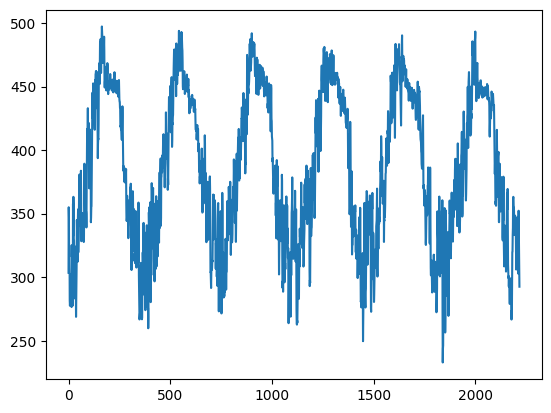

In [271]:
irrd = dfcpy['ALLSKY_SFC_LW_DWN']
dfcpy['ALLSKY_SFC_LW_DWN'].plot()

In [272]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [293]:
WINDOW_SIZE = 10
X1, y1 = df_to_X_y(dfcpy['ALLSKY_SFC_LW_DWN'], WINDOW_SIZE)
X1.shape, y1.shape

((2208, 10, 1), (2208,))

In [294]:
y1

array([298.16, 302.3 , 286.3 , ..., 328.82, 306.61, 292.55])

In [295]:
len(dfcpy)

2218

In [296]:
X_train1, y_train1 = X1[:2000], y1[:2000]
X_val1, y_val1 = X1[2000:2100], y1[2000:2100]
X_test1, y_test1 = X1[2100:], y1[2100:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((2000, 10, 1), (2000,), (100, 10, 1), (100,), (108, 10, 1), (108,))

In [298]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [315]:
model1 = Sequential()
model1.add(InputLayer((10, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                16896     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [316]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1])

Epoch 1/50
56/63 [=========================>....] - ETA: 0s - loss: 150834.5000 - root_mean_squared_error: 388.3742INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 4s 42ms/step - loss: 150706.4375 - root_mean_squared_error: 388.2093 - val_loss: 183648.7656 - val_root_mean_squared_error: 428.5426
Epoch 2/50
62/63 [============================>.] - ETA: 0s - loss: 146647.4219 - root_mean_squared_error: 382.9457INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 146636.9062 - root_mean_squared_error: 382.9320 - val_loss: 178251.8750 - val_root_mean_squared_error: 422.1989
Epoch 3/50
56/63 [=========================>....] - ETA: 0s - loss: 141900.8438 - root_mean_squared_error: 376.6973INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 141015.8750 - root_mean_squared_error: 375.5208 - val_loss: 171000.8750 - val_root_mean_squared_error: 413.5225
Epoch 4/50
58/63 [==========================>...] - ETA: 0s - loss: 134129.3750 - root_mean_squared_error: 366.2368INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 133820.2812 - root_mean_squared_error: 365.8145 - val_loss: 161567.4531 - val_root_mean_squared_error: 401.9545
Epoch 5/50
42/63 [===================>..........] - ETA: 0s - loss: 126272.1406 - root_mean_squared_error: 355.3479INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 124362.7500 - root_mean_squared_error: 352.6510 - val_loss: 150020.2812 - val_root_mean_squared_error: 387.3245
Epoch 6/50
55/63 [=========================>....] - ETA: 0s - loss: 114176.3828 - root_mean_squared_error: 337.9000INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 113395.2812 - root_mean_squared_error: 336.7422 - val_loss: 136444.8594 - val_root_mean_squared_error: 369.3844
Epoch 7/50
62/63 [============================>.] - ETA: 0s - loss: 100332.0781 - root_mean_squared_error: 316.7524INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 100148.8594 - root_mean_squared_error: 316.4630 - val_loss: 120546.2734 - val_root_mean_squared_error: 347.1978
Epoch 8/50
63/63 [==============================] - ETA: 0s - loss: 86583.5781 - root_mean_squared_error: 294.2509INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 86583.5781 - root_mean_squared_error: 294.2509 - val_loss: 104462.0312 - val_root_mean_squared_error: 323.2059
Epoch 9/50
62/63 [============================>.] - ETA: 0s - loss: 73031.3516 - root_mean_squared_error: 270.2431INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 73020.1250 - root_mean_squared_error: 270.2224 - val_loss: 89016.1562 - val_root_mean_squared_error: 298.3557
Epoch 10/50
62/63 [============================>.] - ETA: 0s - loss: 60397.1484 - root_mean_squared_error: 245.7583INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 60347.8906 - root_mean_squared_error: 245.6581 - val_loss: 74457.5469 - val_root_mean_squared_error: 272.8691
Epoch 11/50
60/63 [===========================>..] - ETA: 0s - loss: 49047.5117 - root_mean_squared_error: 221.4667INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 38ms/step - loss: 48756.0312 - root_mean_squared_error: 220.8077 - val_loss: 61108.1602 - val_root_mean_squared_error: 247.2007
Epoch 12/50
62/63 [============================>.] - ETA: 0s - loss: 38486.8711 - root_mean_squared_error: 196.1807INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 38485.7617 - root_mean_squared_error: 196.1779 - val_loss: 49204.0938 - val_root_mean_squared_error: 221.8200
Epoch 13/50
43/63 [===================>..........] - ETA: 0s - loss: 31066.7363 - root_mean_squared_error: 176.2576INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 29706.3555 - root_mean_squared_error: 172.3553 - val_loss: 38916.0703 - val_root_mean_squared_error: 197.2716
Epoch 14/50
49/63 [======================>.......] - ETA: 0s - loss: 23075.3340 - root_mean_squared_error: 151.9057INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 22487.7930 - root_mean_squared_error: 149.9593 - val_loss: 30276.0996 - val_root_mean_squared_error: 174.0003
Epoch 15/50
62/63 [============================>.] - ETA: 0s - loss: 16784.0918 - root_mean_squared_error: 129.5534INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 38ms/step - loss: 16770.8574 - root_mean_squared_error: 129.5023 - val_loss: 23267.7051 - val_root_mean_squared_error: 152.5376
Epoch 16/50
54/63 [========================>.....] - ETA: 0s - loss: 12715.4678 - root_mean_squared_error: 112.7629INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 38ms/step - loss: 12427.0352 - root_mean_squared_error: 111.4766 - val_loss: 17730.9492 - val_root_mean_squared_error: 133.1576
Epoch 17/50
56/63 [=========================>....] - ETA: 0s - loss: 9386.9434 - root_mean_squared_error: 96.8862 INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 9274.4072 - root_mean_squared_error: 96.3037 - val_loss: 13509.4590 - val_root_mean_squared_error: 116.2302
Epoch 18/50
57/63 [==========================>...] - ETA: 0s - loss: 7133.2012 - root_mean_squared_error: 84.4583INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 5s 81ms/step - loss: 7093.1382 - root_mean_squared_error: 84.2208 - val_loss: 10369.7256 - val_root_mean_squared_error: 101.8318
Epoch 19/50
52/63 [=======================>......] - ETA: 0s - loss: 5793.1201 - root_mean_squared_error: 76.1125INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 5653.7065 - root_mean_squared_error: 75.1911 - val_loss: 8066.1494 - val_root_mean_squared_error: 89.8117
Epoch 20/50
55/63 [=========================>....] - ETA: 0s - loss: 4763.6938 - root_mean_squared_error: 69.0195INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 4744.3965 - root_mean_squared_error: 68.8796 - val_loss: 6448.4199 - val_root_mean_squared_error: 80.3021
Epoch 21/50
58/63 [==========================>...] - ETA: 0s - loss: 4234.8735 - root_mean_squared_error: 65.0759INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 4203.2095 - root_mean_squared_error: 64.8322 - val_loss: 5278.5239 - val_root_mean_squared_error: 72.6535
Epoch 22/50
56/63 [=========================>....] - ETA: 0s - loss: 3767.2534 - root_mean_squared_error: 61.3780INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 3819.4722 - root_mean_squared_error: 61.8019 - val_loss: 4538.1245 - val_root_mean_squared_error: 67.3656
Epoch 23/50
62/63 [============================>.] - ETA: 0s - loss: 3538.5896 - root_mean_squared_error: 59.4860INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 3542.4480 - root_mean_squared_error: 59.5185 - val_loss: 3922.9702 - val_root_mean_squared_error: 62.6336
Epoch 24/50
59/63 [===========================>..] - ETA: 0s - loss: 3351.4592 - root_mean_squared_error: 57.8918INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 3s 42ms/step - loss: 3314.4580 - root_mean_squared_error: 57.5713 - val_loss: 3456.7798 - val_root_mean_squared_error: 58.7944
Epoch 25/50
55/63 [=========================>....] - ETA: 0s - loss: 2883.9539 - root_mean_squared_error: 53.7025INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 39ms/step - loss: 2847.8132 - root_mean_squared_error: 53.3649 - val_loss: 3185.5627 - val_root_mean_squared_error: 56.4408
Epoch 26/50
63/63 [==============================] - ETA: 0s - loss: 2358.9834 - root_mean_squared_error: 48.5694INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 40ms/step - loss: 2358.9834 - root_mean_squared_error: 48.5694 - val_loss: 2452.5928 - val_root_mean_squared_error: 49.5237
Epoch 27/50
49/63 [======================>.......] - ETA: 0s - loss: 2021.5084 - root_mean_squared_error: 44.9612INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 1951.8574 - root_mean_squared_error: 44.1798 - val_loss: 2026.3739 - val_root_mean_squared_error: 45.0153
Epoch 28/50
62/63 [============================>.] - ETA: 0s - loss: 1383.1986 - root_mean_squared_error: 37.1914INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 1381.7982 - root_mean_squared_error: 37.1725 - val_loss: 1362.1436 - val_root_mean_squared_error: 36.9072
Epoch 29/50
42/63 [===================>..........] - ETA: 0s - loss: 1136.3041 - root_mean_squared_error: 33.7091INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 1103.6991 - root_mean_squared_error: 33.2220 - val_loss: 977.2659 - val_root_mean_squared_error: 31.2613
Epoch 30/50
62/63 [============================>.] - ETA: 0s - loss: 879.4789 - root_mean_squared_error: 29.6560INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 880.9078 - root_mean_squared_error: 29.6801 - val_loss: 709.5597 - val_root_mean_squared_error: 26.6376
Epoch 31/50
57/63 [==========================>...] - ETA: 0s - loss: 750.8215 - root_mean_squared_error: 27.4011INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 38ms/step - loss: 752.6739 - root_mean_squared_error: 27.4349 - val_loss: 489.4015 - val_root_mean_squared_error: 22.1224
Epoch 32/50
56/63 [=========================>....] - ETA: 0s - loss: 634.4200 - root_mean_squared_error: 25.1877INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 625.2769 - root_mean_squared_error: 25.0055 - val_loss: 351.4220 - val_root_mean_squared_error: 18.7463
Epoch 33/50
56/63 [=========================>....] - ETA: 0s - loss: 534.7977 - root_mean_squared_error: 23.1257INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 38ms/step - loss: 535.5723 - root_mean_squared_error: 23.1424 - val_loss: 271.8957 - val_root_mean_squared_error: 16.4893
Epoch 34/50
60/63 [===========================>..] - ETA: 0s - loss: 469.9196 - root_mean_squared_error: 21.6776INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 468.2849 - root_mean_squared_error: 21.6399 - val_loss: 198.5247 - val_root_mean_squared_error: 14.0899
Epoch 35/50
63/63 [==============================] - 0s 3ms/step - loss: 425.1097 - root_mean_squared_error: 20.6182 - val_loss: 210.9899 - val_root_mean_squared_error: 14.5255
Epoch 36/50
56/63 [=========================>....] - ETA: 0s - loss: 388.3896 - root_mean_squared_error: 19.7076INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 38ms/step - loss: 385.0829 - root_mean_squared_error: 19.6235 - val_loss: 162.6332 - val_root_mean_squared_error: 12.7528
Epoch 37/50
46/63 [====================>.........] - ETA: 0s - loss: 378.2722 - root_mean_squared_error: 19.4492INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 373.2722 - root_mean_squared_error: 19.3203 - val_loss: 157.3043 - val_root_mean_squared_error: 12.5421
Epoch 38/50
55/63 [=========================>....] - ETA: 0s - loss: 368.1576 - root_mean_squared_error: 19.1874INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 360.7664 - root_mean_squared_error: 18.9939 - val_loss: 106.9495 - val_root_mean_squared_error: 10.3416
Epoch 39/50
61/63 [============================>.] - ETA: 0s - loss: 324.8276 - root_mean_squared_error: 18.0230INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 38ms/step - loss: 323.9134 - root_mean_squared_error: 17.9976 - val_loss: 94.6662 - val_root_mean_squared_error: 9.7297
Epoch 40/50
63/63 [==============================] - 0s 3ms/step - loss: 325.3695 - root_mean_squared_error: 18.0380 - val_loss: 117.6733 - val_root_mean_squared_error: 10.8477
Epoch 41/50
58/63 [==========================>...] - ETA: 0s - loss: 312.5875 - root_mean_squared_error: 17.6801INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 309.8441 - root_mean_squared_error: 17.6024 - val_loss: 87.2976 - val_root_mean_squared_error: 9.3433
Epoch 42/50
57/63 [==========================>...] - ETA: 0s - loss: 298.7060 - root_mean_squared_error: 17.2831INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 300.2112 - root_mean_squared_error: 17.3266 - val_loss: 81.4857 - val_root_mean_squared_error: 9.0269
Epoch 43/50
63/63 [==============================] - 0s 3ms/step - loss: 300.9249 - root_mean_squared_error: 17.3472 - val_loss: 82.2083 - val_root_mean_squared_error: 9.0669
Epoch 44/50
63/63 [==============================] - 0s 3ms/step - loss: 303.6590 - root_mean_squared_error: 17.4258 - val_loss: 89.0299 - val_root_mean_squared_error: 9.4356
Epoch 45/50
63/63 [==============================] - 0s 4ms/step - loss: 287.8044 - root_mean_squared_error: 16.9648 - val_loss: 98.3829 - val_root_mean_squared_error: 9.9188
Epoch 46/50
59/63 [===========================>..] - ETA: 0s - loss: 278.5309 - root_mean_squared_error: 16.6892INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 36ms/step - loss: 283.6980 - root_mean_squared_error: 16.8433 - val_loss: 71.2353 - val_root_mean_squared_error: 8.4401
Epoch 47/50
63/63 [==============================] - 0s 3ms/step - loss: 283.6291 - root_mean_squared_error: 16.8413 - val_loss: 92.3442 - val_root_mean_squared_error: 9.6096
Epoch 48/50
59/63 [===========================>..] - ETA: 0s - loss: 276.3574 - root_mean_squared_error: 16.6240INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 276.0848 - root_mean_squared_error: 16.6158 - val_loss: 65.3634 - val_root_mean_squared_error: 8.0848
Epoch 49/50
63/63 [==============================] - 0s 3ms/step - loss: 279.0381 - root_mean_squared_error: 16.7044 - val_loss: 71.6242 - val_root_mean_squared_error: 8.4631
Epoch 50/50
51/63 [=======================>......] - ETA: 0s - loss: 266.9020 - root_mean_squared_error: 16.3371INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


63/63 [==============================] - 2s 37ms/step - loss: 266.9576 - root_mean_squared_error: 16.3388 - val_loss: 58.0209 - val_root_mean_squared_error: 7.6171


In [317]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [318]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

63/63 [==============================] - 0s 1ms/step


,Train Predictions,Actuals
0,299.737488,298.16
1,305.587524,302.30
2,306.676758,286.30
3,300.670715,287.51
4,301.035339,281.38
...,...,...
1995,449.961090,438.52
1996,443.505035,443.88
1997,442.564331,449.35
1998,444.521118,455.70


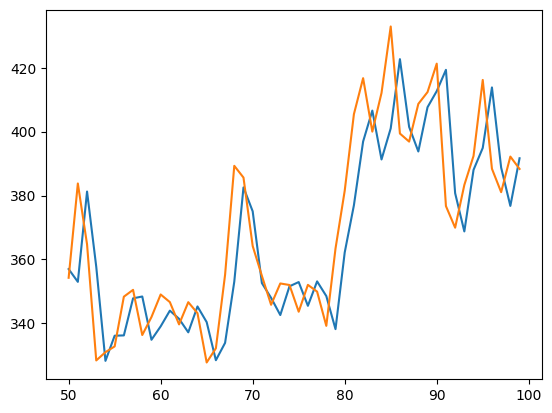

In [319]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])